#### import

In [51]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

(X_train, _),(X_test, y) = datasets.mnist.load_data()

### créer les outputs

In [52]:
X_train_output = X_train.astype("float32")/255.0
X_test_output = X_test.astype("float32")/255.0

### AE

In [53]:
7*7*64

3136

In [54]:
from tensorflow.keras.layers import Input, Rescaling, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Conv2DTranspose

input_img = Input(shape=(28,28,1), dtype='float32')
# entré 28*28*1 pixels = 784

x = Rescaling(1.0/255)(input_img)
# x = Reshape((28,28,1))(x)

# Encoder, réduction spatiale par convolutions
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
# Ici taille 28*28*32 = 25088
x = MaxPooling2D((2,2))(x)
# Ici taille 14*14*32 = 6272
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
# Ici taille 14*14*64 = 12544
x = MaxPooling2D((2,2))(x)
# Ici taille 7*7*64 = 3136

# compression
x = Flatten()(x) # 7*7*64 = 3136
latent = Dense(32, activation='relu', name='latent')(x) 
# Signal fait 32

# Decoder 
x = Dense(7*7*64, activation='relu')(latent) # 32 -> 3136
x = Reshape((7,7,64))(x) # Ici taille 7*7*64 = 3136

x = Conv2DTranspose(64, (3,3), strides=2,activation='relu', padding='same')(x)
# Ici taille 14*14*64 = 12544
x = Conv2DTranspose(32, (3,3), strides=2,activation='relu', padding='same')(x)
# Ici taille 28*28*32 = 25088

decoder = Conv2D(1 , (3,3), activation='sigmoid', padding='same')(x)
# Ici taille 28*28*1 = 784
# 1 seul neuronne car on veut une image noir et blanc 2D

autoencoder = models.Model(input_img, decoder)
autoencoder.compile(optimizer="adam", loss="mse", metrics=["mse"])
autoencoder.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_11 (Rescaling)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3136)           │       103,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_10 (Reshape)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_20             │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_21             │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,369 (1.06 MB)

 Trainable params: 278,369 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
autoencoder.fit(X_train, 
                X_train_output, 
                epochs=10, 
                batch_size=128,
                validation_data=[X_test, X_test_output],
                verbose=1 )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0409 - mse: 0.0409 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


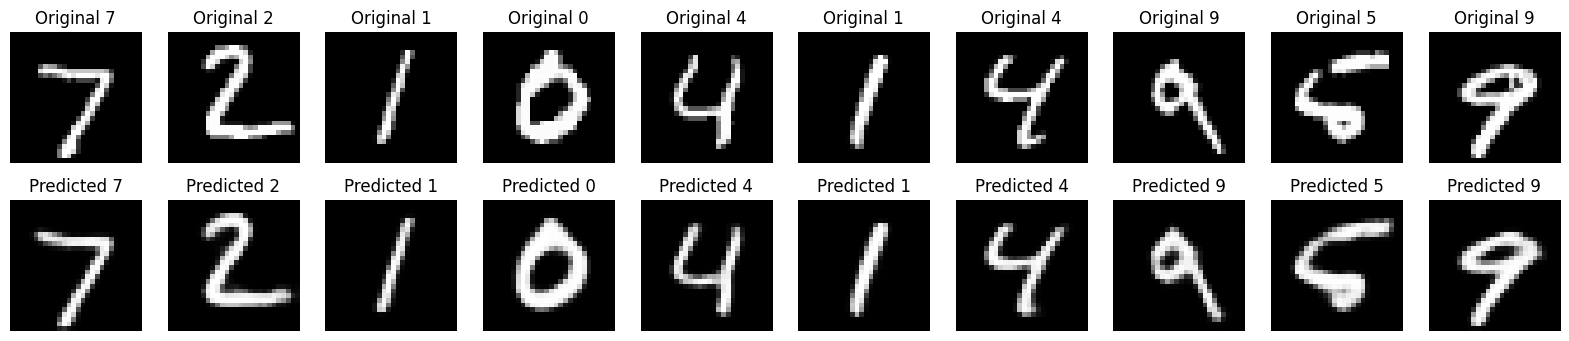

In [56]:
img_pred = autoencoder.predict(X_test)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n): 
    plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Original {y[i]}")
    plt.axis("off")

    plt.subplot(2, n, i+1+n)
    plt.imshow(img_pred[i].reshape(28,28), cmap="gray")
    plt.title(f"Predicted {y[i]}")
    plt.axis("off")    


In [58]:
i

9

In [61]:
activation_model = models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("latent").output)
activations = activation_model.predict(X_test[i].reshape(1,28,28))
activations

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


array([[31.04     , 15.8641615, 20.403961 ,  7.194921 , 14.705005 ,
        25.923956 , 14.552381 ,  7.620565 ,  0.       ,  4.9550266,
         0.       , 11.827123 ,  6.6158185,  4.9521255,  9.805245 ,
         6.0868993, 24.923136 , 11.030538 ,  3.011797 ,  0.       ,
        10.222347 , 16.186337 ,  2.1038892,  0.       ,  9.954105 ,
        20.947096 , 19.417791 , 10.43497  ,  0.       , 21.688929 ,
         9.854749 ,  9.430742 ]], dtype=float32)